# ASSIGNMENT 2: Discrete Fourier Transform
The discrete Fourier transform, or DFT, is the primary tool of digital signal processing. NumPy's `fft` package provides the
functions `fft` and `ifft` to compute the discrete Fourier transform and its inverse, respectively. For the input
signal x its transformed version X is a complex function of frequency. The transform can be presented as $X(ω)
= r(ω)exp(jΦ(ω))$, where the absolute value $r(ω)$ is the amplitude spectrum of the signal and $Φ(ω)$ the phase
spectrum. In Python the amplitude and phase spectrums can be calculated with commands:

```python
Y = np.fft.fft(y)
m = np.abs(Y)
p = np.angle(Y)
```
or
```python
p = np.unwrap(np.angle(Y))
```
which corrects the phase angles in the array **p** by adding multiples of ±2π.

The function `fft` creates a DFT between frequencies f = [0,fs]. Because the sampled signal contains only the
frequencies [0,fs/2], the frequencies between [fs/2,fs] are so called mirror frequencies, which are caused by the
symmetrical properties of the transform.

When an amplitude or phase spectrum is plotted, the values (from 0 to sampling frequency fs) have to be created
for the x-axis. This is done by using a frequency vector **ff** which contains the values [0: fs] and the same number of
elements as <b>Y</b>. **ff** can be created as follows:
```python
ff = fs*np.arange(0, len(Y)) / len(Y)
```
fs is expressed in Hz or when normalized frequencies are used, fs=1. The amplitude spectrum and phase spectrum
are plotted with the commands
```python
plt.stem(ff, m) # amplitude spectrum of the signal
plt.stem(ff, p) # phase spectrum of the signal
```

Start by running the code block below to load the Python packages required to complete this assignment. To run the code, select the code block and push Ctrl+Enter or click the Run button.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Task 2.1.** Create a digital signal s that is a sum of 2 sine wave components s1 and s2 with the
following parameters:

| Signal | Amplitude | Frequency | Sampling frequency | Length | Phase angle |
| ------ |:---------:|:---------:|:------------------:|:------:|:-----------:|
| s1     | 1         | f         | 200 Hz             | 1 s    | 0           |
| s2     | 0.5       | f + 30 Hz | 200 Hz             | 1 s    | π/2         |

where f is the the last two digits of your student number.
Use the function sin_gen2 written in Assignment 1.
Plot the signal s.

In [2]:
def sin_gen2(A, f0, fs, t, fii, plot=False):
    """
    Generate and plot a discrete-time sine wave.
    
    Parameters:
    A :   amplitude
    f0 :  signal frequency in Hertz
    fs :  sampling frequency in Hertz
    t :   signal length in seconds
    fii : phase angle
    plot : whether the signal should be plotted
    
    Returns:
    s sinusoidal signal vector
    """
    # copy your implementation of sin_gen2 from Assignment 1 here
    Ts = 1 / fs  #Sampling interval
    n = np.arange(0, t+Ts, Ts) #Array of sampling
    s = A * np.sin(2* np.pi * f0 * n + fii)  # calculates the sine values

    if plot:
        fig, ax = plt.subplots()
        ax.stem(n, s)  #plots the signal with stem
        ax.set_xlabel('time (s)')  #label for x-axis
        ax.set_title('Discrete-Time Sine Wave')

    return s

# Given parameters
f = 45  #last 2 digits of student number

# s1 parameters
A1 = 1
f1 = f
fs1 = 200
t1 = 1
fii1 = 0

# s2 parameters
A2 = 0.5
f2 = f + 30
fs2 = 200
t2 = 1
fii2 = np.pi / 2
      

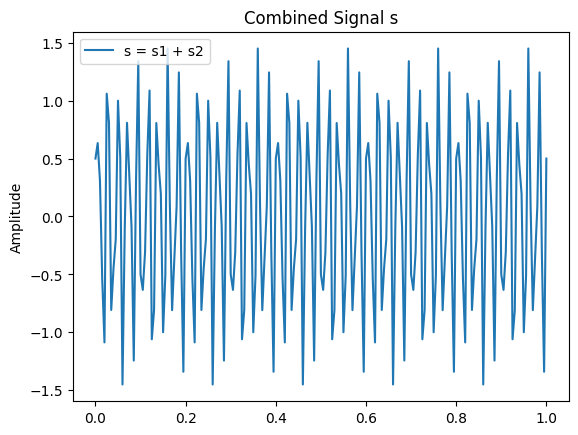

In [3]:
# forms the signals and plot s
s1 = sin_gen2(A1, f1, fs1, t1, fii1)
s2 = sin_gen2(A2, f2, fs2, t2, fii2)

# Sums the signals to form s
s = s1 + s2

# Plots the combined signal s
plt.plot(np.arange(0, t1 + 1/fs1, 1/fs1), s, label='s = s1 + s2')
plt.ylabel('Amplitude')
plt.title('Combined Signal s')
plt.legend()

**Task 2.2.** Plot the amplitude spectrum of the signal s as a function of **normalized frequency**.


x's FFT X = [ 5.00000000e-01+0.00000000e+00j  5.00307132e-01-1.04919125e-02j
  5.01230291e-01-2.10238610e-02j  5.02774796e-01-3.16363089e-02j
  5.04949597e-01-4.23705845e-02j  5.07767405e-01-5.32693358e-02j
  5.11244885e-01-6.43770149e-02j  5.15402903e-01-7.57404011e-02j
  5.20266854e-01-8.74091780e-02j  5.25867059e-01-9.94365761e-02j
  5.32239260e-01-1.11880101e-01j  5.39425226e-01-1.24802366e-01j
  5.47473477e-01-1.38272058e-01j  5.56440174e-01-1.52365058e-01j
  5.66390180e-01-1.67165777e-01j  5.77398362e-01-1.82768722e-01j
  5.89551157e-01-1.99280395e-01j  6.02948495e-01-2.16821564e-01j
  6.17706149e-01-2.35530045e-01j  6.33958632e-01-2.55564098e-01j
  6.51862794e-01-2.77106637e-01j  6.71602319e-01-3.00370473e-01j
  6.93393377e-01-3.25604911e-01j  7.17491824e-01-3.53104128e-01j
  7.44202430e-01-3.83217922e-01j  7.73890847e-01-4.16365657e-01j
  8.06999323e-01-4.53054559e-01j  8.44067574e-01-4.93904060e-01j
  8.85760940e-01-5.39678623e-01j  9.32908936e-01-5.91332732e-01j
  9.86558996

Text(0.5, 1.0, 'Amplitude Spectrum of Signal s')

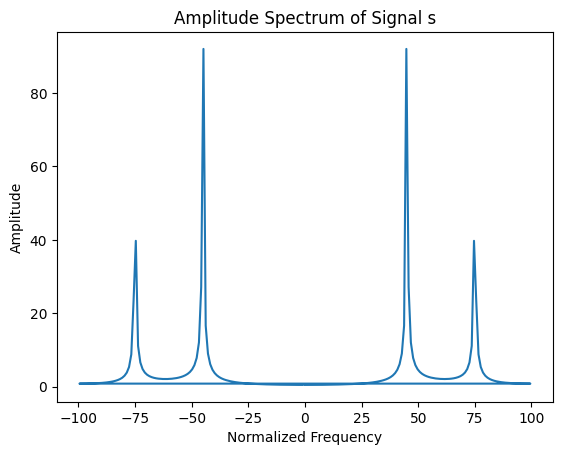

In [4]:
# calculate the frequency response using fft
fs = 200  #sampling frequency
X = np.fft.fft(s)
print("\nx's FFT X =", X)

# take the absolute value of the fft to get the amplitude spectrum
amplitude_spectrum = np.abs(X)

# form the vector ff and plot the amplitude spectrum
N = len(s)
ff = np.fft.fftfreq(N, d=1/fs)

plt.plot(ff, amplitude_spectrum)
plt.xlabel('Normalized Frequency')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum of Signal s')



### Instructions for submission
1. Make sure that your code produces the desired results from scratch by selecting Kernel -> Restart & Run all. This will clear the output of your code and run all the code cells again from top to bottom.

2. Rename this notebook to `DF_Assignment2_firstname_lastname_studentnumber.ipynb`.

3. Submit only the resulting notebook (.ipynb file) to the return box in Moodle. Send your submission before the deadline to receive additional week exam points.